In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the data
original_df = pd.read_csv('doctors_data.csv')

In [ ]:
original_df.columns

Index(['Name', 'Age', 'Gender', 'Nationality', 'Contact Information',
       'Education Country', 'Degree', 'Diploma Certification',
       'Study Start Date', 'Study End Date', 'Courses and Grades',
       'Certificate of Good Conduct', 'Criminal Record in Israel', 'specialty',
       'Total Years of Experience', 'Workplaces', 'Medical Malpractice Claims',
       'Insurance History', 'Insurance History Label', 'Proficiency in Hebrew',
       'Proficiency in English', 'Number of Articles',
       'Academic Institution Name', 'Israeli Medical Licensing Exam Results',
       'Certification Date', 'Total_Number of Surgeries Performed',
       'total_score', 'Accepted', 'experience_score', 'surgery_score',
       'malpractice_score', 'Hebrew_score', 'English_score',
       'insurance_history_score', 'exam_score', 'recommendation_label',
       'recommendation_score', 'patient_feedback_label',
       'patient_feedback_score', 'employer_recommendations_label',
       'employer_recommendation

In [ ]:
relevant_columns = [
  # 'Name',
  'Age',
  # 'Gender',
  # 'Nationality',
  # 'Contact Information',
  'Education Country',
  'Degree',
  'Diploma Certification',
  # 'Study Start Date',
  # 'Study End Date',
  'Certificate of Good Conduct',
  'Criminal Record in Israel',
  'specialty',
  # 'Courses and Grades',
  # 'Workplaces',
  # 'Academic Institution Name',
  'Number of Articles',
  # 'Certification Date',
  'Total Years of Experience',
  # 'experience_score',
  'Total_Number of Surgeries Performed',
  # 'surgery_score',
  'Medical Malpractice Claims',
  # 'malpractice_score',
  'Proficiency in Hebrew',
  # 'Hebrew_score',
  'Proficiency in English',
  # 'English_score',
  'Insurance History Label',
  # 'Insurance History',
  # 'insurance_history_score',
  'Israeli Medical Licensing Exam Results',
  # 'exam_score',
  'recommendation_label',
  # 'recommendation_score',
  'patient_feedback_label',
  # 'patient_feedback_score',
  'employer_recommendations_label',
  # 'employer_recommendations_score',
  'Avg_Grades',
  'Accepted']

In [ ]:
original_df[relevant_columns].iloc[0]

Age                                                 62
Education Country                              Romania
Degree                                              MD
Diploma Certification                             True
Certificate of Good Conduct                       True
Criminal Record in Israel                         True
specialty                                 Neurosurgery
Number of Articles                                   1
Total Years of Experience                           29
Total_Number of Surgeries Performed               2056
Medical Malpractice Claims                           3
Proficiency in Hebrew                           Fluent
Proficiency in English                        Advanced
Insurance History Label                              3
Israeli Medical Licensing Exam Results       82.106975
recommendation_label                               3.0
patient_feedback_label                             1.0
employer_recommendations_label                     4.0
Avg_Grades

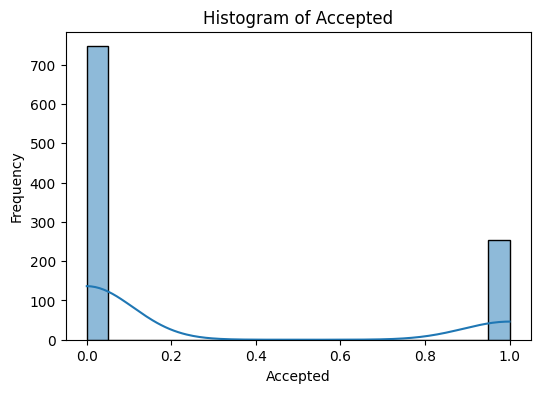

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(6, 4))
sns.histplot(original_df['Accepted'], bins=20, kde=True)
plt.title('Histogram of Accepted')
plt.xlabel('Accepted')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# List of features and the target
features = [
  'Age',
  'Education Country',
  'Degree',
  'Diploma Certification',
  'Certificate of Good Conduct',
  'Criminal Record in Israel',
  'specialty',
  'Number of Articles',
  'Total Years of Experience',
  'Total_Number of Surgeries Performed',
  'Medical Malpractice Claims',
  'Proficiency in Hebrew',
  'Proficiency in English',
  'Insurance History Label',
  'Israeli Medical Licensing Exam Results',
  'recommendation_label',
  'patient_feedback_label',
  'employer_recommendations_label',
  'Avg_Grades',
]
target = 'Accepted'

# Selecting the relevant columns
df = original_df[features + [target]]

# Preprocessing
# Column transformer to handle different types of data
numeric_features = [
  'Age',
  'Number of Articles',
  'Total Years of Experience',
  'Total_Number of Surgeries Performed',
  'Medical Malpractice Claims',
  'Insurance History Label',
  'Israeli Medical Licensing Exam Results',
  'recommendation_label',
  'patient_feedback_label',
  'employer_recommendations_label',
  'Avg_Grades'
]
categorical_features = [
    'Education Country',
    'Degree',
    'Diploma Certification',
    'Certificate of Good Conduct',
    'Criminal Record in Israel',
    'specialty',
    'Proficiency in Hebrew',
    'Proficiency in English'
]

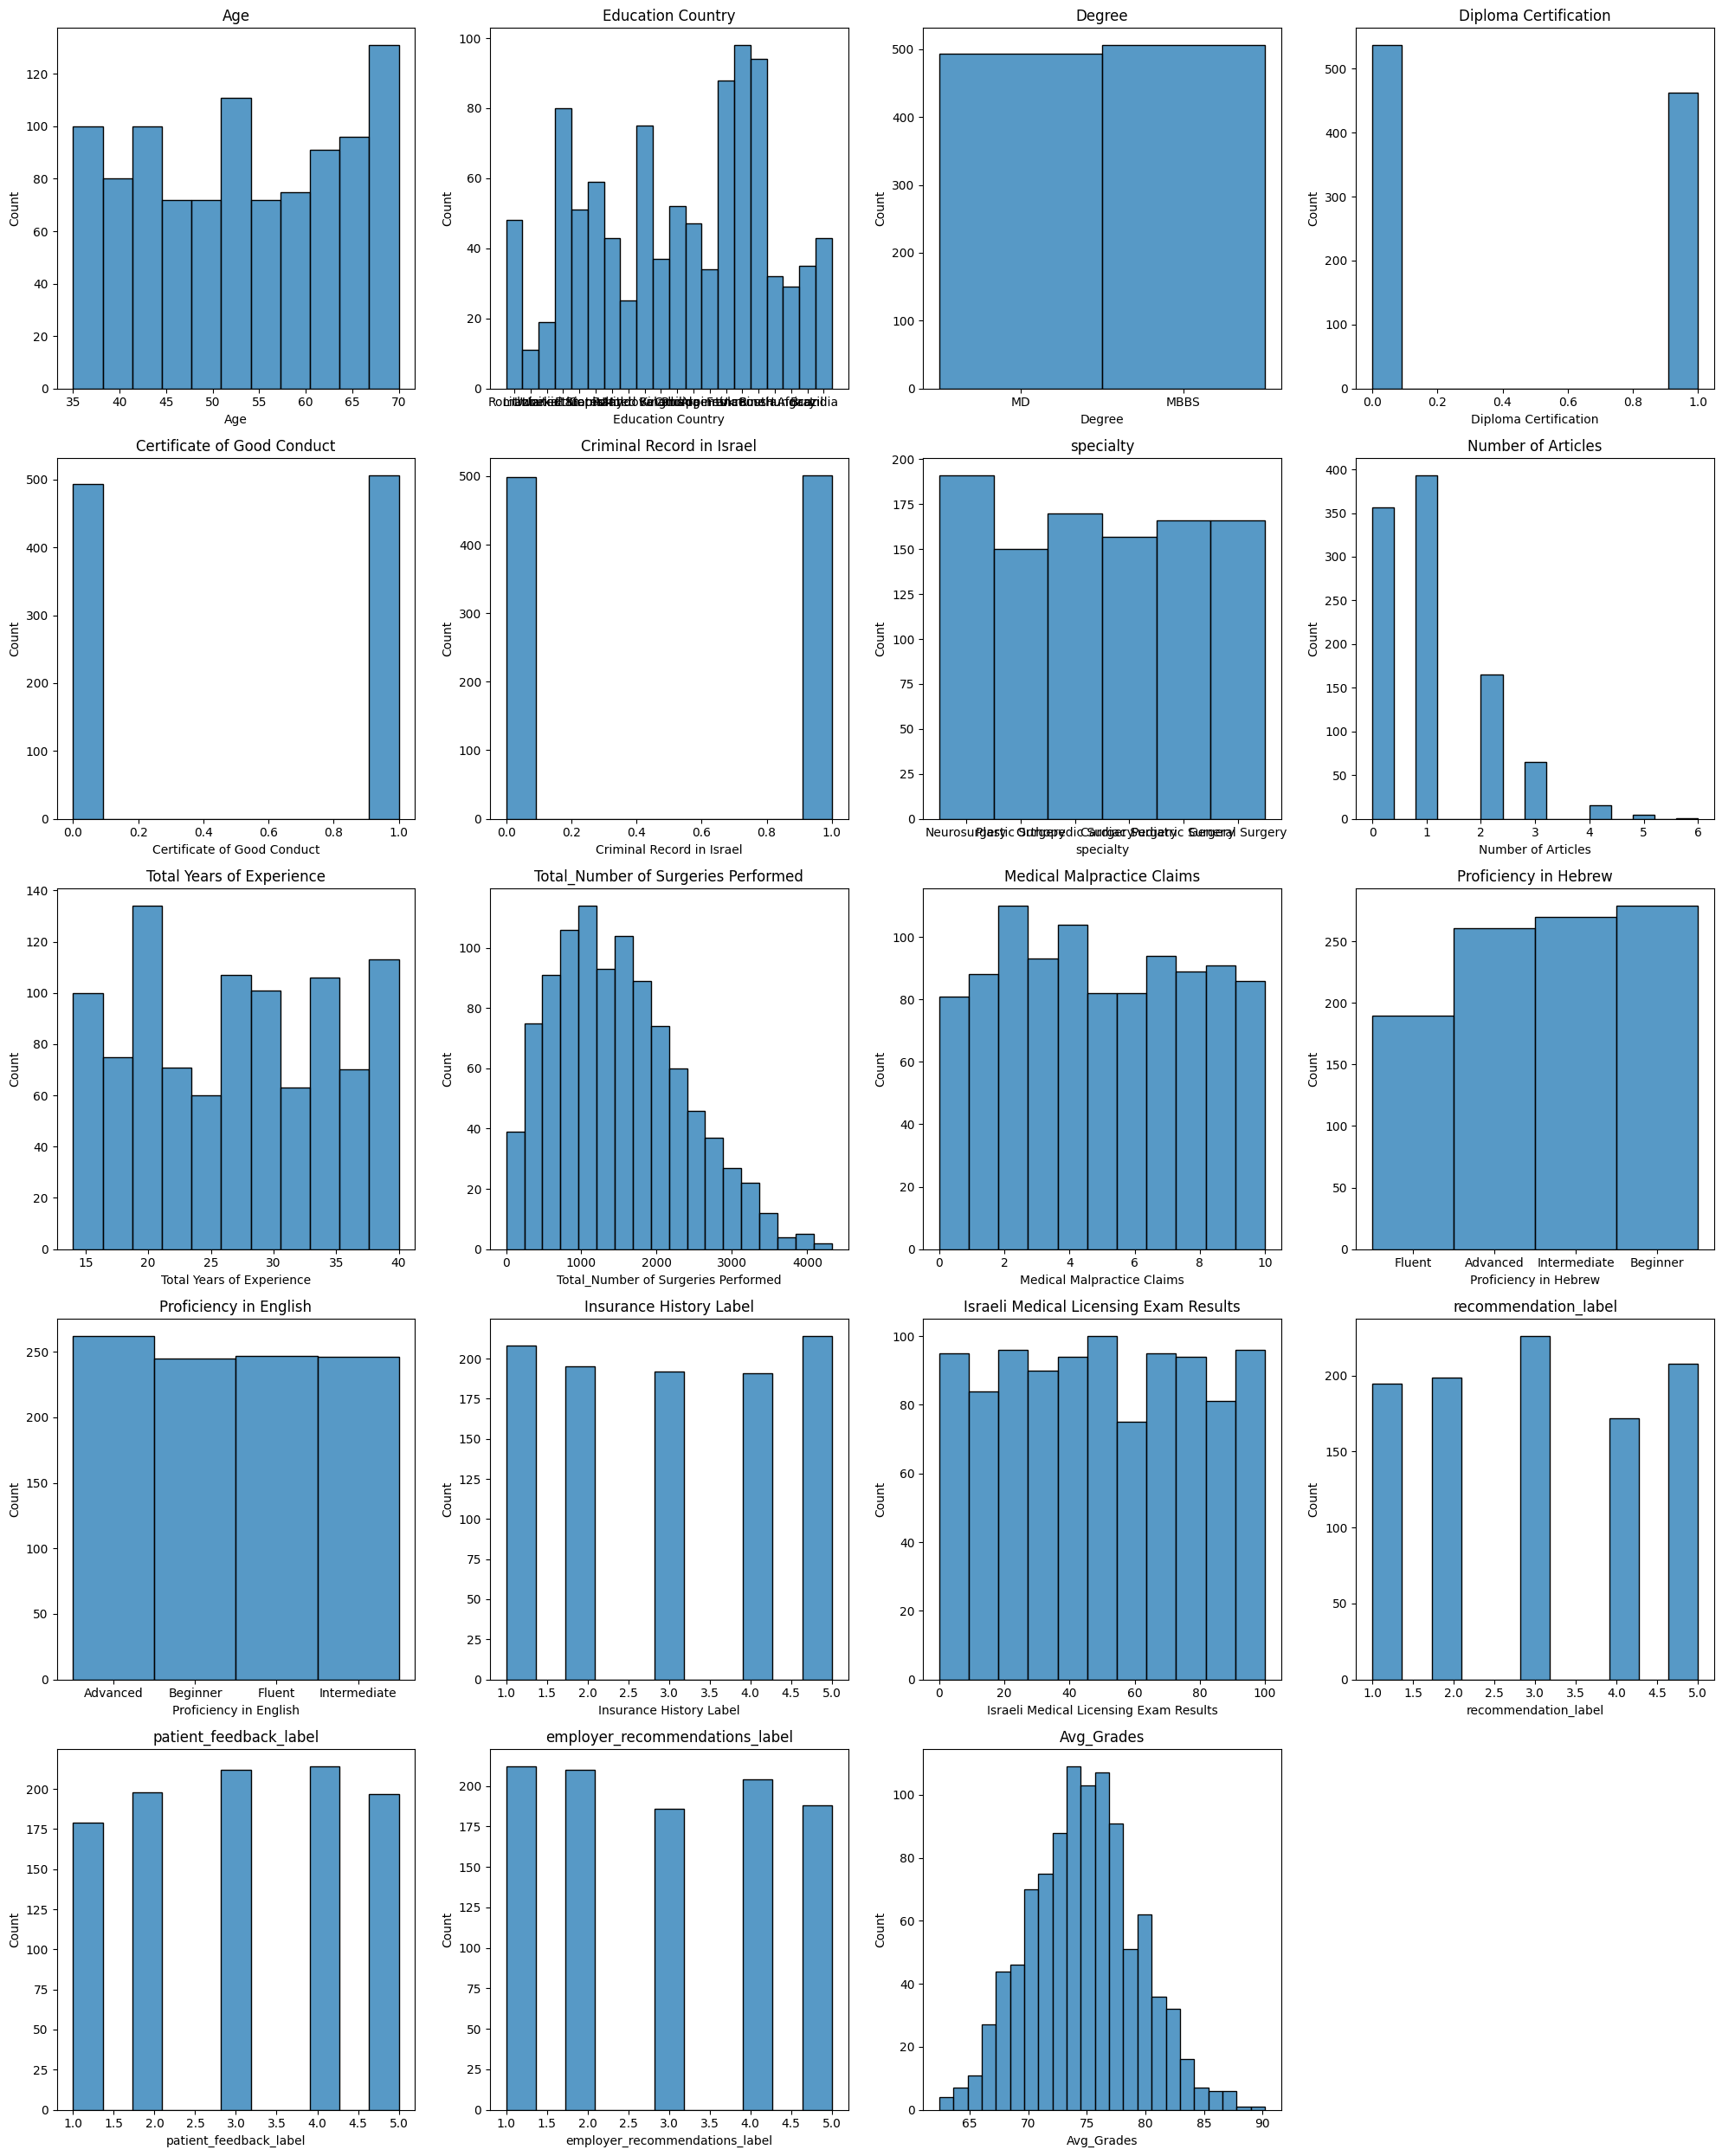

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of features
num_features = len(features)

# Calculate number of rows and columns for subplots
n_cols = 4
n_rows = (num_features + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Preprocessing pipelines for both numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Creating the logistic regression pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])

In [ ]:
# Splitting the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
clf.fit(X_train, y_train)

# Printing the weights
model = clf.named_steps['classifier']
preprocessor = clf.named_steps['preprocessor']
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine numeric and categorical feature names
feature_names = numeric_features + list(ohe_feature_names)

Feature Weights:
Age: 0.17994256151059485
Number of Articles: 0.025512240692968015
Total Years of Experience: 1.7140852604596035
Total_Number of Surgeries Performed: 1.2451467322313219
Medical Malpractice Claims: -4.383035358410918
Insurance History Label: 1.0542348444069873
Israeli Medical Licensing Exam Results: 2.36271348545978
recommendation_label: 1.1458613218916809
patient_feedback_label: 1.266339555547186
employer_recommendations_label: 1.2966537629431552
Avg_Grades: -0.3483055600389563
Education Country_Argentina: 0.6059525212143486
Education Country_Belarus: -0.2708059806639366
Education Country_Brazil: 0.6983713867425565
Education Country_Canada: 0.023914729984561043
Education Country_Ethiopia: -0.35324707238706804
Education Country_France: -0.04829149100620396
Education Country_Germany: 0.5807651796759159
Education Country_Hungary: 0.7254151872598813
Education Country_India: -0.2002293918707289
Education Country_Lithuania: -0.43475792953084713
Education Country_Moldova: 0.34

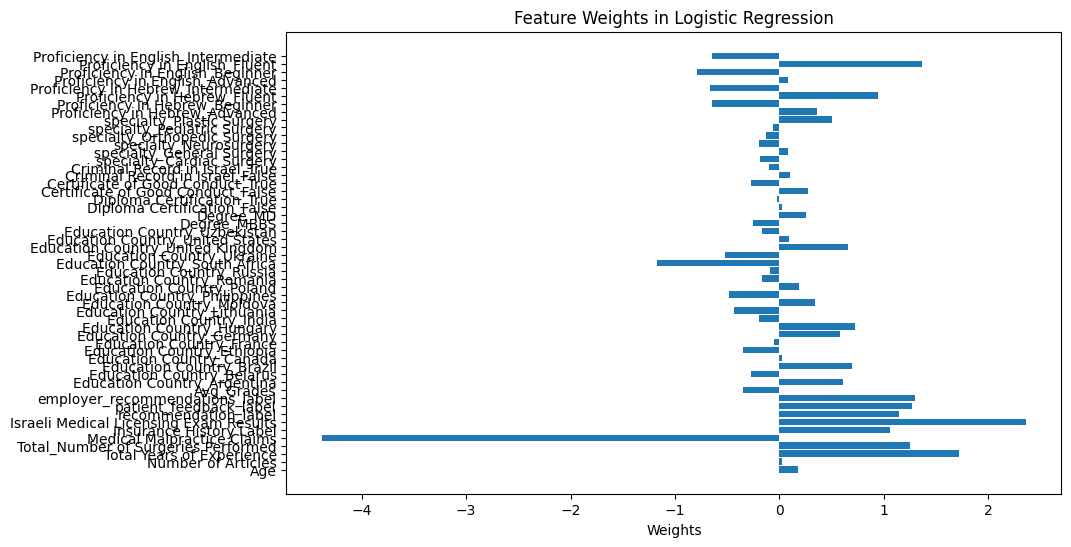

In [ ]:
weights = model.coef_[0]
print("Feature Weights:")
for feature, weight in zip(feature_names, weights):
    print(f"{feature}: {weight}")

# Plotting the weights
plt.figure(figsize=(10, 6))
plt.barh(feature_names, weights)
plt.xlabel('Weights')
plt.title('Feature Weights in Logistic Regression')
plt.show()

<ipython-input-12-f51ba2d55c93>:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


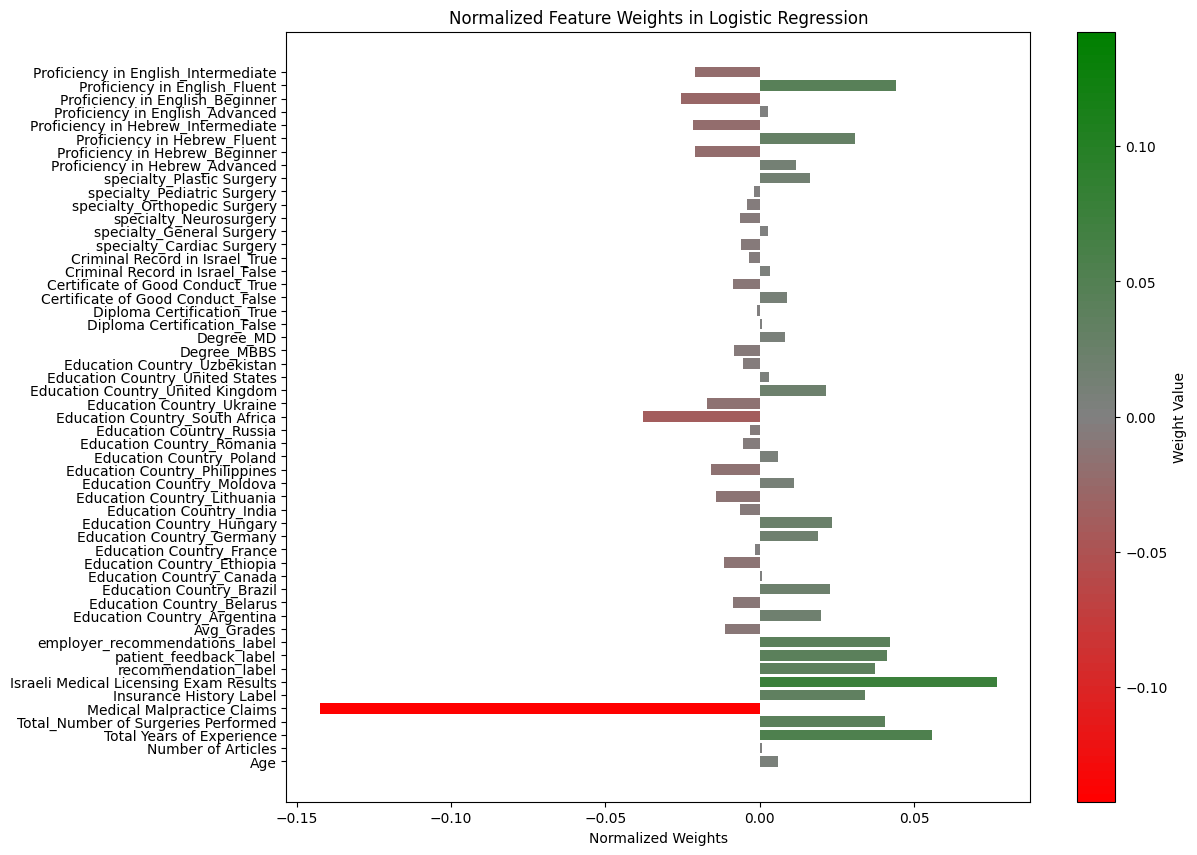

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Normalizing the weights
total_weight = sum(abs(weight) for weight in weights)
normalized_weights = weights / total_weight

# Create a larger plot
plt.figure(figsize=(12, 10))

# Define a custom colormap from red to white to green
colors = ["red", "grey", "green"]
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'red_white_green'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalize the weights for the color mapping
norm = plt.Normalize(vmin=-max(abs(normalized_weights)), vmax=max(abs(normalized_weights)))
colors = cmap(norm(normalized_weights))

# Plotting the weights
plt.barh(feature_names, normalized_weights, color=colors)
plt.xlabel('Normalized Weights')
plt.title('Normalized Feature Weights in Logistic Regression')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Weight Value')

plt.show()


In [ ]:

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')


Accuracy: 0.955
Confusion Matrix:
[[152   5]
 [  4  39]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       157
        True       0.89      0.91      0.90        43

    accuracy                           0.95       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.96      0.95      0.96       200



In [ ]:
categorical_features

['Education Country',
 'Degree',
 'Diploma Certification',
 'Certificate of Good Conduct',
 'Criminal Record in Israel',
 'specialty',
 'Proficiency in Hebrew',
 'Proficiency in English']

In [ ]:
len(ohe_feature_names)

42

In [ ]:
def save_original_df_with_weigths(df):
  # Extract columns that are not input to the model
  columns_without_weights = [col for col in df.columns if col not in features]
  non_categorical_cols = [col for col in df.columns if col not in categorical_features]

  # Combine preprocessing steps
  df_transformed = preprocessor.transform(df[features])

  # Get the transformed feature names
  ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
  ohe_feature_names = ohe.get_feature_names_out(categorical_features)
  feature_names = numeric_features + list(ohe_feature_names)

  # Create a DataFrame with the transformed features
  df_transformed = pd.DataFrame(df_transformed, columns=feature_names)
  print(len(df_transformed.columns))

  num_df = df_transformed[numeric_features]
  df_transformed = df_transformed[ohe_feature_names]

  # Combine with the columns that are not input to the model
  df = pd.concat([df[non_categorical_cols].reset_index(drop=True), df_transformed], axis=1)
  print(len(df.columns))

  # Create a DataFrame with the normalized weights
  weights_df = pd.DataFrame({
      'Feature': feature_names,
      'Normalized_Weight': normalized_weights
  })

  # Adding weights to the original DataFrame
  for feature, weight in zip(feature_names, normalized_weights):
      df[feature + '_Weight'] = weight

  # Select the order of columns
  columns_with_weights = []
  for feature in feature_names:
      columns_with_weights.extend([feature, feature + '_Weight'])

  # Reorder the DataFrame columns
  df_with_weights = df[columns_without_weights + columns_with_weights]

  return df_with_weights, num_df

df_with_weights, num_df = save_original_df_with_weigths(original_df)

# Save the DataFrame to a CSV file
df_with_weights.to_csv('df_with_weights.csv', index=False)
df_with_weights['Age']

53
76


0      62
1      43
2      51
3      57
4      59
       ..
995    61
996    69
997    55
998    41
999    55
Name: Age, Length: 1000, dtype: int64

In [ ]:
num_df.columns = [f"{col}_normed" for col in num_df.columns]
num_df

,Age_normed,Number of Articles_normed,Total Years of Experience_normed,Total_Number of Surgeries Performed_normed,Medical Malpractice Claims_normed,Insurance History Label_normed,Israeli Medical Licensing Exam Results_normed,recommendation_label_normed,patient_feedback_label_normed,employer_recommendations_label_normed,Avg_Grades_normed
0,0.822898,0.007596,0.260671,0.650134,-0.609311,-0.011319,1.088513,0.008873,-1.498824,0.719963,-2.502400
1,-0.961927,0.007596,0.131466,0.845980,0.027045,0.685247,-0.495760,1.428475,-0.772121,0.719963,-0.992005
2,-0.210422,-1.005173,-1.548196,0.586017,0.663402,-1.404452,0.696208,0.718674,-1.498824,0.719963,-0.474156
3,0.353208,0.007596,-1.677401,1.144412,-0.291133,0.685247,-0.663245,-0.700929,-1.498824,-0.684843,2.050360
4,0.541084,0.007596,1.423514,-0.482977,-1.245668,-0.011319,0.216815,-0.700929,0.681283,0.017560,-0.344694
...,...,...,...,...,...,...,...,...,...,...,...
995,0.728960,0.007596,0.260671,-0.649679,-0.927489,1.381813,0.757562,0.008873,0.681283,-1.387246,-0.366271
996,1.480466,0.007596,-0.514558,0.159352,1.299758,0.685247,-1.242468,0.008873,1.407986,-1.387246,-1.250930
997,0.165331,1.020364,0.519080,-0.697475,-0.927489,1.381813,-0.318763,1.428475,-0.045419,-1.387246,0.906776
998,-1.149803,-1.005173,1.035899,1.490641,1.299758,1.381813,-0.072453,1.428475,-0.772121,-1.387246,0.583120


In [ ]:
num_df.to_csv("normed_df.csv", index=False)

In [ ]:
df_with_weights.columns.tolist()

['Name',
 'Gender',
 'Nationality',
 'Contact Information',
 'Study Start Date',
 'Study End Date',
 'Courses and Grades',
 'Workplaces',
 'Insurance History',
 'Academic Institution Name',
 'Certification Date',
 'total_score',
 'Accepted',
 'experience_score',
 'surgery_score',
 'malpractice_score',
 'Hebrew_score',
 'English_score',
 'insurance_history_score',
 'exam_score',
 'recommendation_score',
 'patient_feedback_score',
 'employer_recommendations_score',
 'Age',
 'Age_Weight',
 'Number of Articles',
 'Number of Articles_Weight',
 'Total Years of Experience',
 'Total Years of Experience_Weight',
 'Total_Number of Surgeries Performed',
 'Total_Number of Surgeries Performed_Weight',
 'Medical Malpractice Claims',
 'Medical Malpractice Claims_Weight',
 'Insurance History Label',
 'Insurance History Label_Weight',
 'Israeli Medical Licensing Exam Results',
 'Israeli Medical Licensing Exam Results_Weight',
 'recommendation_label',
 'recommendation_label_Weight',
 'patient_feedback_l

In [ ]:
len(feature_names), len(weights)

(53, 53)

In [ ]:
feature_names

['Age',
 'Number of Articles',
 'Total Years of Experience',
 'Total_Number of Surgeries Performed',
 'Medical Malpractice Claims',
 'Insurance History Label',
 'Israeli Medical Licensing Exam Results',
 'recommendation_label',
 'patient_feedback_label',
 'employer_recommendations_label',
 'Avg_Grades',
 'Education Country_Argentina',
 'Education Country_Belarus',
 'Education Country_Brazil',
 'Education Country_Canada',
 'Education Country_Ethiopia',
 'Education Country_France',
 'Education Country_Germany',
 'Education Country_Hungary',
 'Education Country_India',
 'Education Country_Lithuania',
 'Education Country_Moldova',
 'Education Country_Philippines',
 'Education Country_Poland',
 'Education Country_Romania',
 'Education Country_Russia',
 'Education Country_South Africa',
 'Education Country_Ukraine',
 'Education Country_United Kingdom',
 'Education Country_United States',
 'Education Country_Uzbekistan',
 'Degree_MBBS',
 'Degree_MD',
 'Diploma Certification_False',
 'Diploma 

In [ ]:
normalized_weights

array([ 0.00584375,  0.00082853,  0.05566602,  0.04043694, -0.14234189,
        0.03423695,  0.07673064,  0.03721258,  0.04112519,  0.04210966,
       -0.01131145,  0.0196787 , -0.0087946 ,  0.02268006,  0.00077665,
       -0.01147193, -0.0015683 ,  0.01886072,  0.02355832, -0.00650258,
       -0.01411904,  0.01117896, -0.01574914,  0.00592689, -0.00539852,
       -0.00307687, -0.03796322, -0.01694869,  0.02137399,  0.00304132,
       -0.00546233, -0.00826521,  0.0082856 ,  0.00084178, -0.00082139,
        0.00875236, -0.00873197,  0.00334447, -0.00332408, -0.00618408,
        0.00251789, -0.00634011, -0.00425271, -0.00196521,  0.0162446 ,
        0.01161922, -0.02087334,  0.03074517, -0.02147066,  0.00253091,
       -0.02566061,  0.04420215, -0.02105206])